C:\Users\Nilay\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\Nilay\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


[Text(0,0,'$V$'),
 Text(0,0,'$D$'),
 Text(0,0,'$G$'),
 Text(0,0,'$V$'),
 Text(0,0,'$D$'),
 Text(0,0,'$G$')]

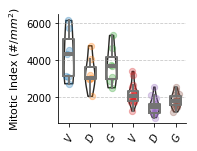

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.stats as st

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

df = pd.read_excel('ph3_quantification.xlsx',sheet_name = 'Sheet1')
a = data=df[["v_c"]].values
a = a[~np.isnan(a)].tolist()
b = data=df[["d_c"]].values
b = b[~np.isnan(b)].tolist()
c = data=df[["g_c"]].values
c = c[~np.isnan(c)].tolist()
d = data=df[["v_r"]].values
d = d[~np.isnan(d)].tolist()
e = data=df[["d_r"]].values
e = e[~np.isnan(e)].tolist()
f = data=df[["g_r"]].values
f = f[~np.isnan(f)].tolist()

POSITIONS = [0,1,2,3,4,5]
x_label = ('$V$', '$D$', '$G$', '$V$', '$D$', '$G$')
fig, ax = plt.subplots(figsize=(2.3, 2))
plt.rcParams.update({'font.size': 11})
y_data = [a, b, c, d, e, f]

violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,   
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)    

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
for x, y in zip(x_jittered, y_data):
    plt.scatter(x, y, s=40, alpha=0.3)

ax.set_xlabel('')
ax.set_ylabel(r'Mitotic Index (#/$mm^{2}$)', fontsize = 11)
ax.set_ylim(600,6500)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_label, rotation=60)

In [4]:
import pandas as pd
from scipy import stats
import numpy as np


table_data = {'Comparison': [], 'Mean Difference': [], 't-statistic': [], 'p-value': [], 'Effect Size': [], '95% CI Lower': [], '95% CI Upper': []}

### c- Control, m - Mutant, D-Dorsal, V- Ventral
comparisons = [('VDc', a, b), ('VcVm', a, d), ('DcDm', b, e), ('VDm',d,e), ('GcGm',c,f)]

for comparison, group1, group2 in comparisons:
    t_stat, p_value = stats.ttest_ind(group1, group2)
    mean_diff = round(abs(np.mean(group1) - np.mean(group2)), 2)
    effect_size = round(mean_diff / np.std(group1 + group2), 2) 
    ci = stats.t.interval(0.95, len(group1) + len(group2) - 2, loc=np.mean(group1) - np.mean(group2), scale=stats.sem(group1 + group2))
    table_data['Comparison'].append(comparison)
    table_data['Mean Difference'].append(mean_diff)
    table_data['t-statistic'].append(t_stat)
    table_data['p-value'].append(p_value)
    table_data['Effect Size'].append(effect_size)
    table_data['95% CI Lower'].append(round(ci[0], 2))
    table_data['95% CI Upper'].append(round(ci[1], 2))

result_table = pd.DataFrame(table_data)
print(result_table)

  Comparison  Mean Difference  t-statistic       p-value  Effect Size  \
0        VDc           959.03     1.574698  1.413090e-01         0.83   
1       VcVm          2088.93     5.523885  1.496647e-05         1.68   
2       DcDm          1773.39     6.784031  8.124151e-07         1.81   
3        VDm           643.48     3.881534  4.879673e-04         1.13   
4       GcGm          1890.20     6.865263  6.777452e-07         1.82   

   95% CI Lower  95% CI Upper  
0        258.81       1659.25  
1       1550.30       2627.57  
2       1349.62       2197.15  
3        441.84        845.13  
4       1440.24       2340.15  


### RyR

(0.0006, 0.0065)

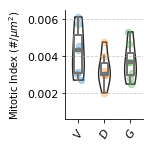

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.stats as st

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

df = pd.read_excel('ph3_quantification.xlsx',sheet_name = 'Sheet1')
a = data=df[["v_c"]].values
a = a[~np.isnan(a)].tolist()
b = data=df[["d_c"]].values
b = b[~np.isnan(b)].tolist()
c = data=df[["g_c"]].values
c = c[~np.isnan(c)].tolist()

a = [x*(10**-6) for x in a]
b = [x*(10**-6) for x in b]
c = [x*(10**-6) for x in c]

POSITIONS = [0,1,2]
x_label = ('$V$', '$D$', '$G$')
fig, ax = plt.subplots(figsize=(1.4, 2))
plt.rcParams.update({'font.size': 11})
y_data = [a, b, c]

violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,  
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)    

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
for x, y in zip(x_jittered, y_data):
    plt.scatter(x, y, s=40, alpha=0.3)

ax.set_xlabel('')
ax.set_ylabel(r'Mitotic Index (#/$\mu m^{2}$)', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_label, rotation=60)
ax.set_ylim(600*(10**-6),6500*(10**-6))
#lt.savefig('Figure3CRyR.svg', format='svg')

### PiezoRNAi

(0.0006, 0.0065)

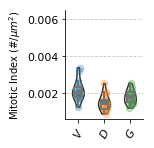

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy.stats as st

BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

df = pd.read_excel('ph3_quantification.xlsx',sheet_name = 'Sheet1')

d = data=df[["v_r"]].values
d = d[~np.isnan(d)].tolist()
e = data=df[["d_r"]].values
e = e[~np.isnan(e)].tolist()
f = data=df[["g_r"]].values
f = f[~np.isnan(f)].tolist()

d = [x*(10**-6) for x in d]
e = [x*(10**-6) for x in e]
f = [x*(10**-6) for x in f]

POSITIONS = [0,1,2]
x_label = ('$V$', '$D$', '$G$')
fig, ax = plt.subplots(figsize=(1.4, 2))
plt.rcParams.update({'font.size': 11})
y_data = [d, e, f]

violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers = False, 
    showcaps = False,  
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)    

jitter = 0.04
x_data = [np.array([i] * len(d)) for i, d in enumerate(y_data)]
x_jittered = [x + st.t(df=6, scale=jitter).rvs(len(x)) for x in x_data]
for x, y in zip(x_jittered, y_data):
    plt.scatter(x, y, s=40, alpha=0.3)

ax.set_xlabel('')
ax.set_ylabel(r'Mitotic Index (#/$\mu m^{2}$)', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(x_label, rotation=60)
ax.set_ylim(600*(10**-6),6500*(10**-6))
#plt.savefig('Figure3C_PiezoRNAi.svg', format='svg')